In [41]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Pad naar de map met je CSV-bestanden
directory = 'Data 12-5-2025/SMall oli bottle'

# Zoek alle .CSV bestanden in die map
csv_paths = glob.glob(os.path.join(directory, '*.CSV'))

# Woordenboek om per bestand de DataFrame op te slaan
dfs = {}

for path in csv_paths:
    # Haal de bestandsnaam zonder extensie
    fname = os.path.splitext(os.path.basename(path))[0]
    # Maak er een geldige Python-variabele-achtige naam van
    var_name = fname.strip().replace(' ', '_').replace('-', '_')
    
    # Lees in met skiprows=2, zodat de 3e rij als header wordt gebruikt
    df = pd.read_csv(path, skiprows=2)
    
    # Sla op in het woordenboek
    dfs[var_name] = df
    
    # (optioneel) kies je ervoor om meteen een echte variabele aan te maken:
    globals()[var_name] = df

# Voorbeeld: lijst van ingelezen DataFrames
print("Ingelezen bestanden:", list(dfs.keys()))

# Voorbeeld: eerste 5 rijen van één DataFrame
voorbeeld = list(dfs.keys())[0]
print(f"\nEerste 5 rijen van '{voorbeeld}':")
print(dfs[voorbeeld].head())

Ingelezen bestanden: ['S11_TR2_FREQ_INSDIDE_INSIDE_TUNED', 'S11_TR2_SMITH_INSDIDE_INSIDE_TUNED', 'S11_TR2_SMITH_OUTSIDE_INSIDE_TUNED', 'S11_TR3_FREQS_OUTSIDE_INSIDE_TUNED', 'S22_TR2_FREQ_INSDIDE_INSIDE_TUNED', 'S22_TR2_SMITH_INSDIDE_INSIDE_TUNED', 'S22_TR2_SMITH_OUTSIDE_INSIDE_TUNED', 'S22_TR4_FREQS_OUTSIDE_INSIDE_TUNED', 'TEST1_S11_SMITH_CHART_OUTSIDE_TUNED_INSIDE']

Eerste 5 rijen van 'S11_TR2_FREQ_INSDIDE_INSIDE_TUNED':
     Frequency   Formatted Data   Formatted Data.1
0  283000000.0        -8.439894                0.0
1  283018750.0        -8.433201                0.0
2  283037500.0        -8.430837                0.0
3  283056250.0        -8.426395                0.0
4  283075000.0        -8.423921                0.0


In [56]:
namen_data_smith = []
namen_data_freq=[]
for dataframe in dfs.keys():
    if 'SMITH' in dataframe:
        namen_data_smith.append(dataframe)
    else:
        namen_data_freq.append(dataframe)

In [57]:
dfs[namen_data_freq[1]][' Formatted Data']

0      -9.015703
1      -9.016738
2      -9.022366
3      -9.024196
4      -9.027629
          ...   
1596   -3.723016
1597   -3.756687
1598   -3.791620
1599   -3.826426
1600   -3.860061
Name:  Formatted Data, Length: 1601, dtype: float64

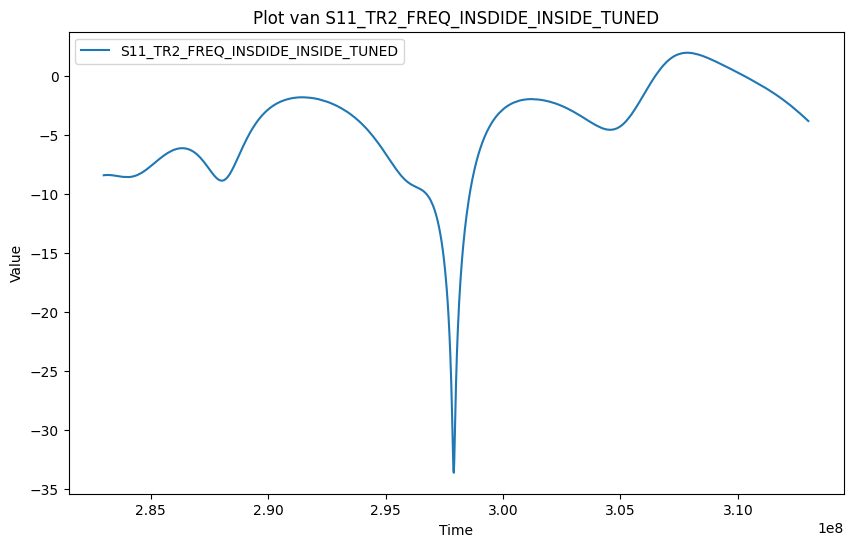

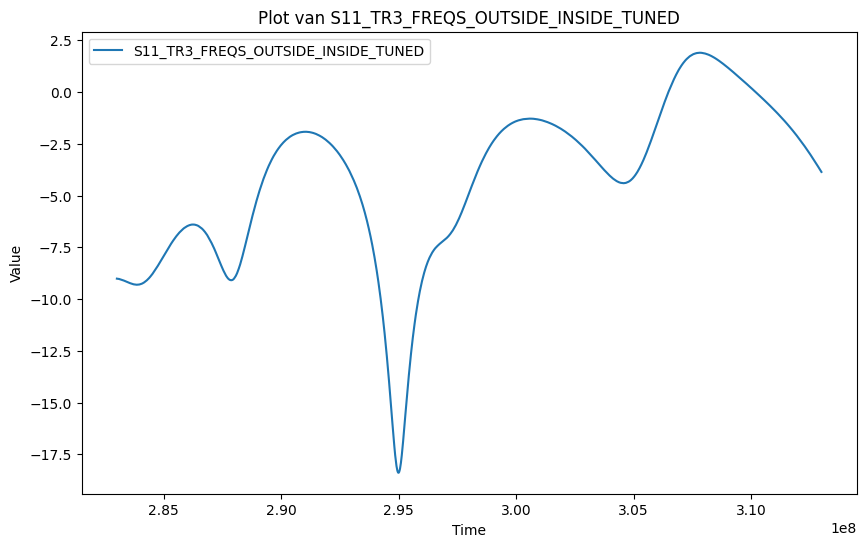

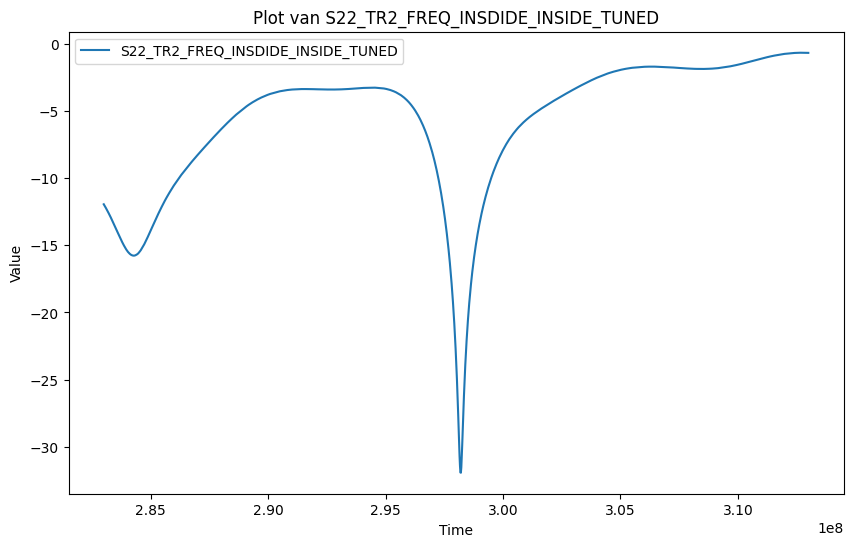

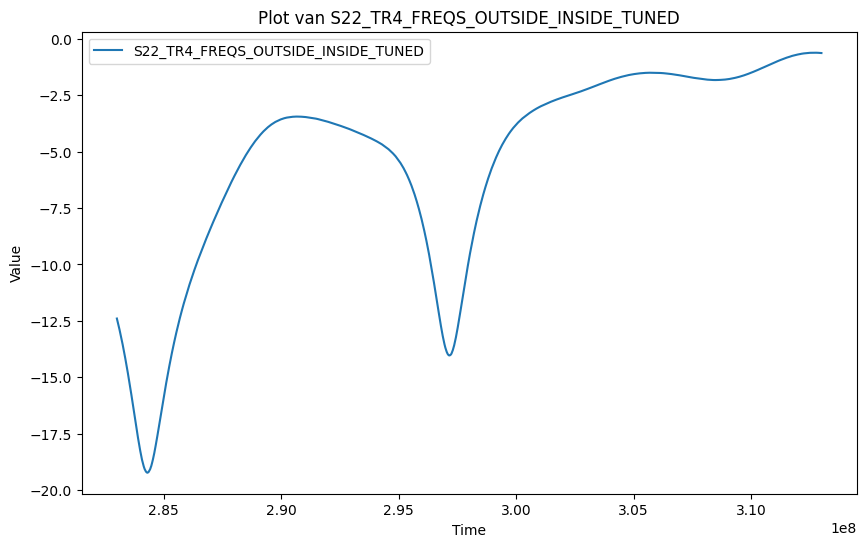

In [59]:
for naam in namen_data_freq:
    plt.figure(figsize=(10, 6))
    plt.plot(dfs[naam]['Frequency'], dfs[naam][' Formatted Data'], label=naam)
    plt.title(f'Plot van {naam}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()